# Introduction
<h5>Dataset - heart.csv</h5>
<h5>Predictions - patients have heart disease(1) or not(0)</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("../input/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### EDA

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

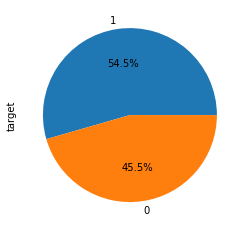

In [6]:
plt.figure()
df['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

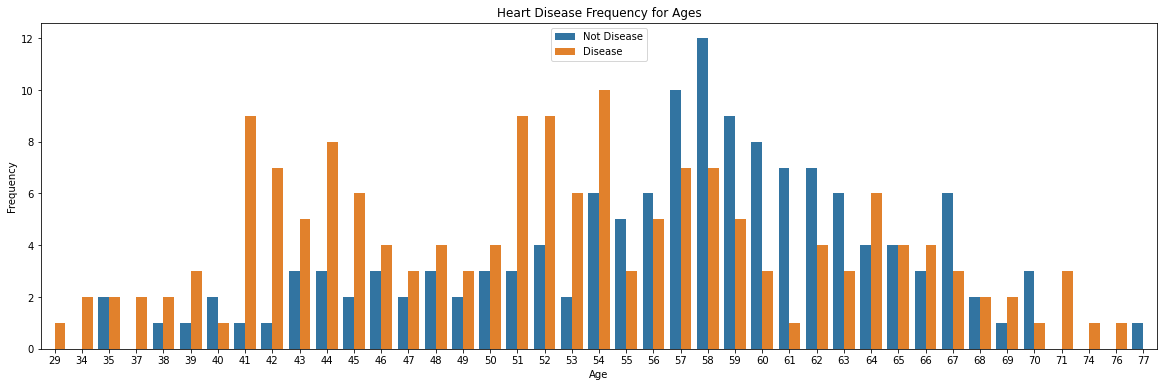

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='age',hue='target')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend([ "Not Disease","Disease"])
plt.show()

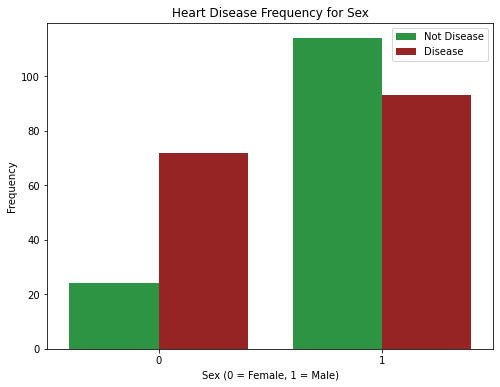

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='sex',hue='target',palette=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend([ "Not Disease","Disease"])
plt.show()

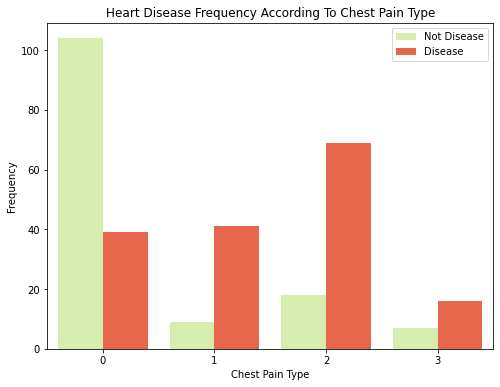

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='cp',hue='target',palette=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend([ "Not Disease","Disease"])
plt.show()

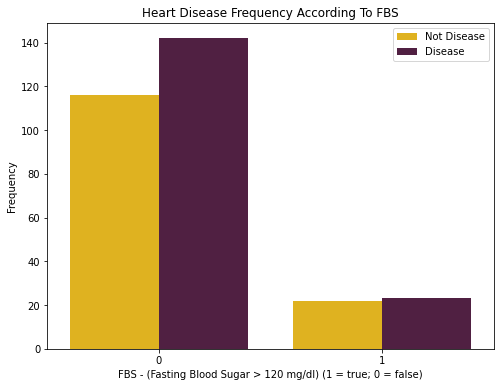

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='fbs',hue='target',palette=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.ylabel('Frequency')
plt.legend([ "Not Disease","Disease"])
plt.show()

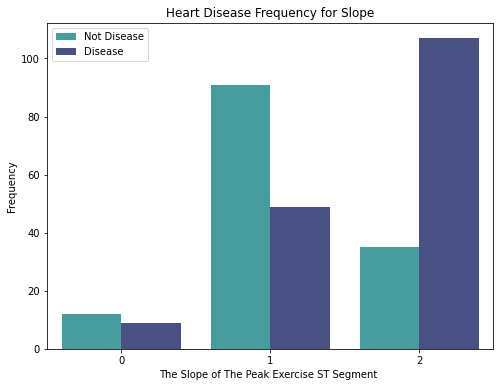

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='slope',hue='target',palette='mako_r')
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.ylabel('Frequency')
plt.legend([ "Not Disease","Disease"])
plt.show()

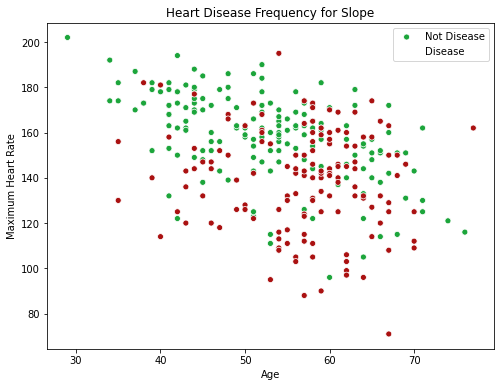

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='age',y='thalach',hue='target',palette=['#AA1111','#1CA53B'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel("Age")

plt.ylabel("Maximum Heart Rate")
plt.legend([ "Not Disease","Disease"])
plt.show()

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
accuracies = []
precision = []
recall = []

In [8]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracies.append((accuracy_score(y_test,y_pred))*100)
    precision.append((precision_score(y_test,y_pred))*100)
    recall.append((recall_score(y_test,y_pred))*100)
    print(classification_report(y_test,y_pred))
    return model

### Baseline model

In [9]:
log = LogisticRegression()
create_model(log)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



LogisticRegression()

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf = RandomForestClassifier(n_estimators=200,random_state=1,min_samples_leaf=50)
create_model(rf)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



RandomForestClassifier(min_samples_leaf=50, n_estimators=200, random_state=1)

### KNN

<p>Standardize the Variables</p>

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [29]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [30]:
scaled_features = pd.DataFrame(scaled_features,columns = df.columns[:-1])
scaled_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [32]:
X = scaled_features
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

<p>Choosing a K Value<p>

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

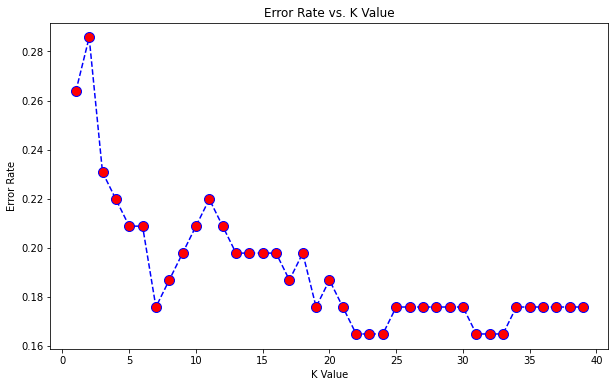

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=23)
create_model(knn)

              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.80      0.94      0.86        50

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.83        91
weighted avg       0.85      0.84      0.83        91



KNeighborsClassifier(n_neighbors=23)

### SVM Models

#### 1.Simple Linear SVM

In [36]:
# Hard margin
svc1 = LinearSVC(random_state=1)
create_model(svc1)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(random_state=1)

In [37]:
# Soft Margin
svc2 = LinearSVC(random_state=1,C=0.5)
create_model(svc2)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(C=0.5, random_state=1)

### SVM Kernel Trick

#### 1. Polynomial 

In [38]:
poly_svc = SVC(random_state=1,kernel="poly",C=0.4)
create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        41
           1       0.73      0.90      0.80        50

    accuracy                           0.76        91
   macro avg       0.78      0.74      0.74        91
weighted avg       0.77      0.76      0.75        91



SVC(C=0.4, kernel='poly', random_state=1)

#### 2. Radial Bais

In [39]:
radial_svc = SVC(random_state=1,kernel="rbf")
create_model(radial_svc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.80      0.80      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



SVC(random_state=1)

### Grid Search

In [40]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [41]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [42]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.721, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.738, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] 

[CV] .................. C=10, gamma=0.0001, score=0.744, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.791, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.786, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.810, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.833, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.558, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.605, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [43]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [44]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [45]:
create_model(grid)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.721, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.535, total=   0.0s
[CV] 

[CV] ...................... C=100, gamma=1, score=0.571, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.698, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.814, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.833, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.952, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.810, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.698, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

### Comparing Models

In [46]:
accuracies

[80.21978021978022,
 80.21978021978022,
 83.51648351648352,
 76.92307692307693,
 76.92307692307693,
 75.82417582417582,
 78.02197802197803,
 80.21978021978022]

In [47]:
precision

[79.62962962962963,
 78.57142857142857,
 79.66101694915254,
 77.35849056603774,
 77.35849056603774,
 72.58064516129032,
 80.0,
 79.62962962962963]

In [48]:
recall

[86.0, 88.0, 94.0, 82.0, 82.0, 90.0, 80.0, 86.0]

In [49]:
models = ["Logistic Regression","Random Forest","KNN","Linear SVM Hard Margin","Linear SVM Soft Margin","Polynomial Kernel","Radial Bias Kernel","Grid Seach"]
values = [precision,recall,accuracies]
result = {}

In [50]:
values

[[79.62962962962963,
  78.57142857142857,
  79.66101694915254,
  77.35849056603774,
  77.35849056603774,
  72.58064516129032,
  80.0,
  79.62962962962963],
 [86.0, 88.0, 94.0, 82.0, 82.0, 90.0, 80.0, 86.0],
 [80.21978021978022,
  80.21978021978022,
  83.51648351648352,
  76.92307692307693,
  76.92307692307693,
  75.82417582417582,
  78.02197802197803,
  80.21978021978022]]

In [51]:
def Extract(values,x):
    return ([i[x] for i in values])           

In [52]:
x = 0
for key in models:
    result[key] = Extract(values,x)
    x += 1

In [53]:
result

{'Logistic Regression': [79.62962962962963, 86.0, 80.21978021978022],
 'Random Forest': [78.57142857142857, 88.0, 80.21978021978022],
 'KNN': [79.66101694915254, 94.0, 83.51648351648352],
 'Linear SVM Hard Margin': [77.35849056603774, 82.0, 76.92307692307693],
 'Linear SVM Soft Margin': [77.35849056603774, 82.0, 76.92307692307693],
 'Polynomial Kernel': [72.58064516129032, 90.0, 75.82417582417582],
 'Radial Bias Kernel': [80.0, 80.0, 78.02197802197803],
 'Grid Seach': [79.62962962962963, 86.0, 80.21978021978022]}

In [54]:
cost_function = ["Precision","Recall","Accuracy"]
score_df = pd.DataFrame(result,index=cost_function)
score_df

,Logistic Regression,Random Forest,KNN,Linear SVM Hard Margin,Linear SVM Soft Margin,Polynomial Kernel,Radial Bias Kernel,Grid Seach
Precision,79.62963,78.571429,79.661017,77.358491,77.358491,72.580645,80.000000,79.62963
Recall,86.00000,88.000000,94.000000,82.000000,82.000000,90.000000,80.000000,86.00000
Accuracy,80.21978,80.219780,83.516484,76.923077,76.923077,75.824176,78.021978,80.21978


<p>Conclusion: Our models work fine but best of them are Linear SVM Soft and Hard margin ,KNN and Random Forest with high accuracy,precision and recall. </p>